# Linear Regression on Real Estate Dataset

[Dataset for the same](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/Data/Real%20estate%20valuation%20data%20set.xlsx)


[EDA for this dataset](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/Python%20Notebooks/real_estate.ipynb)

In [6]:
# Importing all the necessary packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#from sklearn.cross_validation import train_test_split
# You can use sklearn.model_selection in place of sklearn.cross_validation


In [7]:
# loading the dataset

estate = pd.read_excel('../../Lab1/Heenal/Data/Real estate valuation data set.xlsx')

In [8]:
estate.shape

(414, 8)

In [10]:
# Separating the data and the target variable
# Retaining all the features

X = estate.drop(['Y house price of unit area','No'], axis = 1)
Y = estate['Y house price of unit area']

In [29]:
X.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [14]:
data_x = X.values
data_y = Y.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.4, random_state=0)

In [16]:
X_train.shape

(248, 6)

In [17]:
X_test.shape

(166, 6)

In [18]:
X_new = preprocessing.scale(X_train)

In [19]:
# Fitting the data to model

lin = LinearRegression().fit(X_train,y_train)

In [20]:
lin.intercept_

-15749.735860948294

In [23]:
lin.score(X_test, y_test)

0.5963978418529725

In [24]:
data_pred = lin.predict(X_test)

In [25]:
metrics.mean_squared_error(y_test, data_pred)

67.73912214763399

In [26]:
metrics.mean_absolute_error(y_test, data_pred)

6.149550743751199

## Plotting actual vs the predictions

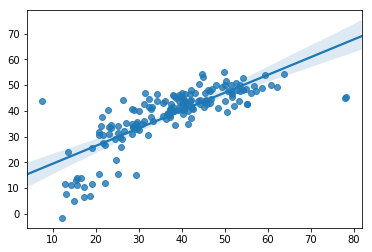

In [28]:
sns.regplot(y_test, data_pred)

### From the EDA performed earlier, we found out that X3, X4, X5 and X6 have the maximum correlation with target variable. Hence trying out with them.

In [30]:
# Separating the data and target variables

X_d = estate.drop(['Y house price of unit area','No', 'X1 transaction date'], axis = 1)
Y = estate['Y house price of unit area']

In [31]:
data_xd = X_d.values
data_y = Y.values

In [32]:
lin = LinearRegression().fit(data_xd,data_y)

In [33]:
lin.score(data_xd,data_y)

0.5711617064827472

In [34]:
data_pred = lin.predict(data_xd)

In [36]:
metrics.mean_squared_error(data_y, data_pred)

79.2018518921085

In [38]:
metrics.r2_score(data_y, data_pred)

0.5711617064827472

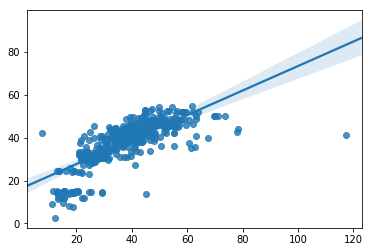

In [39]:
sns.regplot(data_y, data_pred)

## Using sklearn to select the best features

In [47]:
# to select 6 best features
data_xnew = SelectKBest(f_regression, k=6).fit_transform(data_x, data_y)

In [48]:
data_xnew.shape

(414, 6)

In [49]:
lin = LinearRegression().fit(data_xnew,data_y)

In [50]:
lin.score(data_xnew,data_y)

0.5823850447850805

In [51]:
data_pred = lin.predict(data_xnew)

In [52]:
metrics.mean_squared_error(data_y, data_pred)

77.12902119719605